In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


In [34]:
df = pd.read_csv(r'C:\Users\opandey2\Desktop\train.csv')
data = pd.DataFrame(df)

In [35]:
data.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [32]:
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [33]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,10.699354,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,4.207852,2.616983,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,8.000000,9.842329,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.842329,9.842329,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,9.842329,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
#Finding Mean of the variable 'Product_category_2 and Product_category_3'


data_mean_cat2 = data['Product_Category_2'].mean()
data_mean_cat3 = data['Product_Category_3'].mean()

In [9]:
#Filling null values with mean

data = data.fillna(data_mean_cat2)
data = data.fillna(data_mean_cat3)
data.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.842329,9.842329,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,14.000000,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.842329,9.842329,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000000,9.842329,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.842329,9.842329,7969


In [10]:
#Checking null values agani

data.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [11]:
#Checking duplicates

data.duplicated().sum()

0

In [12]:
#Grouping age by city 

group_age = data.groupby(['Age', 'City_Category']) ['City_Category'].count().unstack()
group_age

City_Category,A,B,C
Age,,,
0-17,2544,5435,7123
18-25,27535,43247,28878
26-35,73745,91584,54258
36-45,26617,47598,35798
46-50,7607,20406,17688
51-55,6099,17741,14661
55+,3573,5162,12769


<Axes: xlabel='Age'>

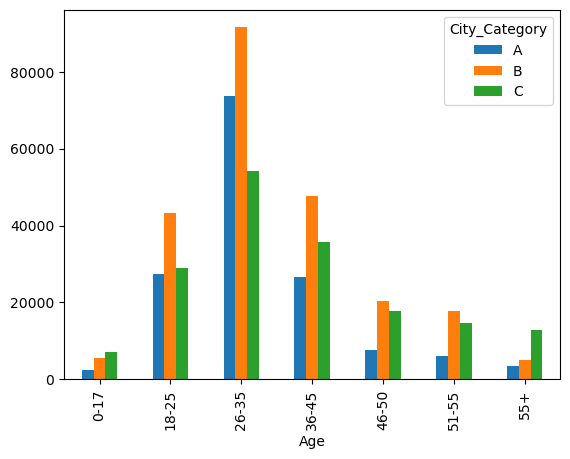

In [13]:
group_age.plot(kind='bar')

A large number of buyers are aged 26-35 are men.

In [14]:
data_Occupation = data.groupby(['Age', 'Occupation'])['Occupation'].count().unstack()
data_Occupation

Occupation,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
Age,,,,,,,,,,,,,,,,,,,,,
0-17,2134.0,387.0,144.0,NaN,113.0,NaN,NaN,139.0,29.0,NaN,...,18.0,237.0,15.0,93.0,NaN,NaN,35.0,NaN,807.0,NaN
18-25,9095.0,3820.0,4364.0,1860.0,48241.0,1450.0,1144.0,2078.0,14.0,559.0,...,717.0,4585.0,NaN,4388.0,906.0,1816.0,3944.0,1085.0,2500.0,5445.0
26-35,34204.0,19080.0,12617.0,8159.0,21829.0,6082.0,7216.0,24060.0,378.0,1489.0,...,5009.0,15279.0,NaN,13446.0,6874.0,7070.0,17064.0,2243.0,3468.0,13994.0
36-45,13393.0,9501.0,5183.0,4126.0,1747.0,3066.0,4822.0,18762.0,98.0,3096.0,...,2732.0,6848.0,427.0,5590.0,2585.0,7572.0,10252.0,1527.0,1008.0,7508.0
46-50,4488.0,7089.0,2124.0,1599.0,129.0,1187.0,2561.0,6664.0,549.0,528.0,...,1584.0,2491.0,631.0,1445.0,854.0,3032.0,4662.0,1124.0,261.0,2699.0
51-55,4602.0,4410.0,1344.0,1094.0,249.0,377.0,3952.0,5355.0,317.0,398.0,...,1383.0,1417.0,1785.0,1012.0,514.0,3918.0,2528.0,531.0,200.0,3115.0
55+,1722.0,3139.0,812.0,812.0,NaN,15.0,660.0,2075.0,161.0,221.0,...,143.0,322.0,4870.0,1335.0,432.0,1963.0,1558.0,112.0,217.0,801.0


In [15]:
data_gender = data.groupby(['Age', 'Gender'])['Gender'].count().unstack()
data_gender

Gender,F,M
Age,,
0-17,5083,10019
18-25,24628,75032
26-35,50752,168835
36-45,27170,82843
46-50,13199,32502
51-55,9894,28607
55+,5083,16421


<Axes: xlabel='Age'>

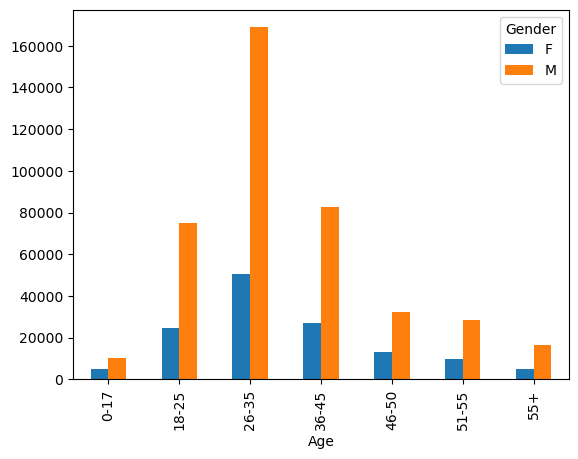

In [16]:
data_gender.plot(kind = 'bar')

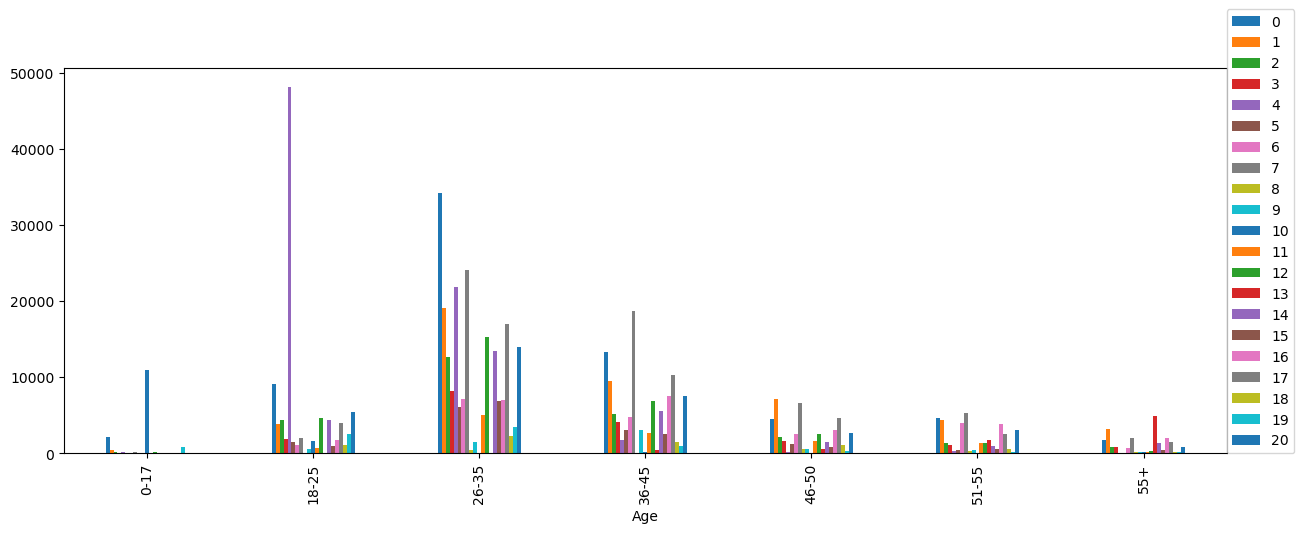

In [17]:
data_Occupation.plot(kind='bar', figsize=(15,5))
plt.legend(loc=(1,0))

We found out that among all categories, people aged 18-25 work the most by profession 4

We got that men are more likely to shop in this store, Let's sort them out and see where they work and their age.

In [18]:
data_m = data[data['Gender'] == 'M']
data_m

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.842329,9.842329,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.000000,9.842329,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.000000,17.000000,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.000000,9.842329,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.000000,9.842329,15686
...,...,...,...,...,...,...,...,...,...,...,...,...
550057,1006023,P00370853,M,26-35,0,C,2,1,19,9.842329,9.842329,61
550058,1006024,P00372445,M,26-35,12,A,0,1,20,9.842329,9.842329,121
550060,1006026,P00371644,M,36-45,6,C,1,1,20,9.842329,9.842329,494
550062,1006032,P00372445,M,46-50,7,A,3,0,20,9.842329,9.842329,473


In [19]:
data_m_group = data_m.groupby(['Age', 'Occupation']) ['Occupation'].count().unstack()
data_m_group

Occupation,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
Age,,,,,,,,,,,,,,,,,,,,,
0-17,1387.0,214.0,53.0,NaN,113.0,NaN,NaN,96.0,29.0,NaN,...,18.0,237.0,15.0,93.0,NaN,NaN,35.0,NaN,692.0,NaN
18-25,6848.0,2130.0,2356.0,1278.0,36078.0,1369.0,1027.0,1726.0,14.0,30.0,...,681.0,4212.0,NaN,3241.0,659.0,1577.0,3633.0,1085.0,1813.0,3715.0
26-35,26124.0,11678.0,10110.0,3995.0,17020.0,5297.0,4471.0,18906.0,378.0,66.0,...,4318.0,13842.0,NaN,9473.0,5405.0,6435.0,15324.0,2171.0,2876.0,10920.0
36-45,10153.0,6203.0,3527.0,2212.0,1168.0,2024.0,2895.0,16402.0,59.0,352.0,...,2214.0,5909.0,427.0,4624.0,2354.0,6010.0,9078.0,1527.0,385.0,5150.0
46-50,2571.0,3801.0,1117.0,1143.0,68.0,975.0,1210.0,5623.0,549.0,NaN,...,1533.0,2165.0,551.0,1124.0,513.0,2196.0,4014.0,1124.0,261.0,1964.0
51-55,3329.0,2910.0,607.0,694.0,25.0,277.0,2166.0,4528.0,37.0,NaN,...,1211.0,1223.0,1474.0,869.0,514.0,3461.0,2472.0,373.0,200.0,2237.0
55+,1114.0,2506.0,189.0,409.0,NaN,15.0,426.0,1824.0,119.0,NaN,...,111.0,122.0,3763.0,1122.0,330.0,1585.0,1558.0,112.0,217.0,765.0


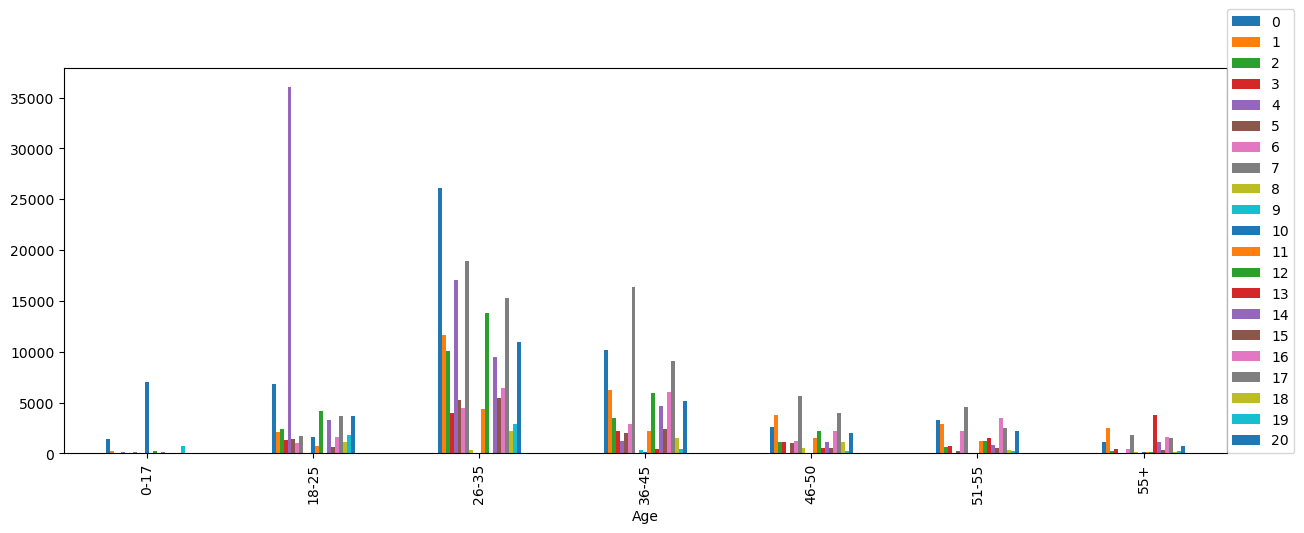

In [20]:
data_m_group.plot(kind ='bar', figsize=(15,5))
plt.legend(loc=(1,0))

In [21]:
data_stay_in_current_cyear = data_m.groupby(['Age', 'Stay_In_Current_City_Years', 'City_Category'])['Stay_In_Current_City_Years'].count().unstack()
data_stay_in_current_cyear

City_Category                           A        B        C
Age   Stay_In_Current_City_Years                           
0-17  0                             157.0    193.0   1165.0
      1                             382.0   1421.0   1529.0
      2                             213.0   1285.0    705.0
      3                             345.0    553.0    691.0
      4+                              NaN    418.0    962.0
18-25 0                            4033.0   5112.0   2968.0
      1                            7974.0   9975.0   7014.0
      2                            2731.0   6677.0   4202.0
      3                            3294.0   3892.0   4014.0
      4+                           3234.0   5905.0   4007.0
26-35 0                           10020.0   7496.0   4982.0
      1                           16093.0  24828.0  15729.0
      2                           11781.0  12851.0   8373.0
      3                            9783.0  13898.0   6809.0
      4+                           8577.0  11074.0   6541.0
36-45 0                            2976.0   4430.0   3516.0
      1                            7570.0  12495.0   7749.0
      2                            3420.0   6330.0   5862.0
      3                            2754.0   8727.0   5637.0
      4+                           2792.0   4506.0   4079.0
46-50 0                             628.0   2086.0   1758.0
      1                            2439.0   5513.0   4065.0
      2                             827.0   2881.0   2030.0
      3                             548.0   2081.0   1437.0
      4+                           1915.0   1441.0   2853.0
51-55 0                             591.0   1462.0   1358.0
      1                            2130.0   5572.0   4803.0
      2                             976.0   2036.0   1514.0
      3                             167.0   1815.0   1395.0
      4+                            457.0   2613.0   1718.0
55+   0                             741.0    668.0    995.0
      1                             577.0   1113.0   3552.0
      2                             304.0    479.0   2029.0
      3                             450.0    887.0   1588.0
      4+                           1137.0    664.0   1237.0

<Axes: xlabel='Age,Stay_In_Current_City_Years'>

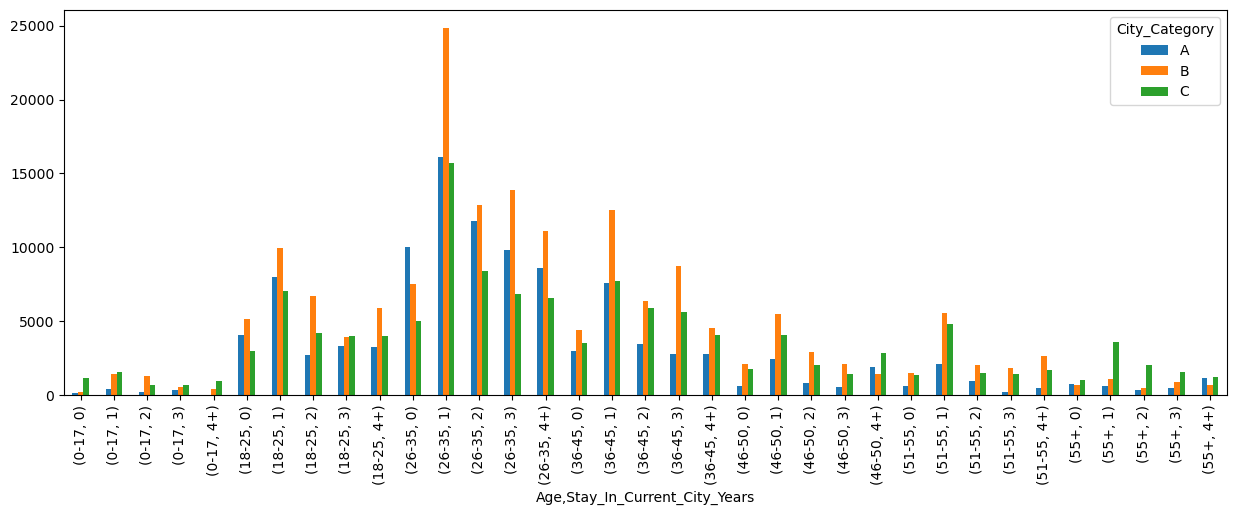

In [22]:
data_stay_in_current_cyear.plot(kind='bar', figsize=(15,5))

Most of the men aged 26-35 live in City B for only 1 year

In [23]:
data_marital_status = data_m.groupby(['Age','Marital_Status']) ['Marital_Status'].count().unstack()
data_marital_status

Marital_Status,0,1
Age,,
0-17,10019.0,NaN
18-25,60187.0,14845.0
26-35,103218.0,65617.0
36-45,49728.0,33115.0
46-50,9524.0,22978.0
51-55,7259.0,21348.0
55+,5975.0,10446.0


<Axes: xlabel='Age'>

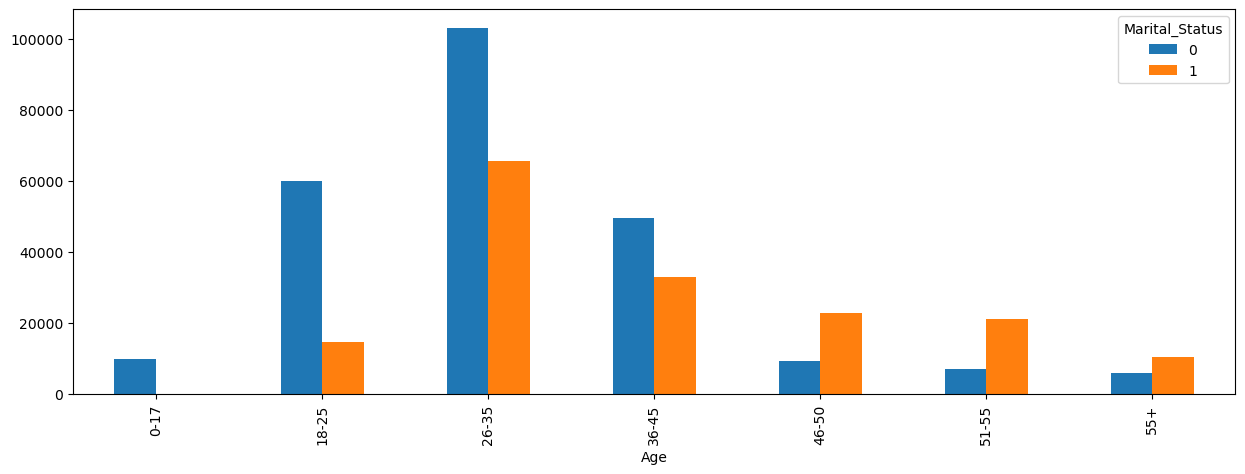

In [24]:
data_marital_status.plot(kind='bar', figsize=(15,5))

Most of the men are not married

In [25]:
product_cat = data_m.groupby('Age')[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']].count().unstack()
product_cat

                    Age  
Product_Category_1  0-17      10019
                    18-25     75032
                    26-35    168835
                    36-45     82843
                    46-50     32502
                    51-55     28607
                    55+       16421
Product_Category_2  0-17      10019
                    18-25     75032
                    26-35    168835
                    36-45     82843
                    46-50     32502
                    51-55     28607
                    55+       16421
Product_Category_3  0-17      10019
                    18-25     75032
                    26-35    168835
                    36-45     82843
                    46-50     32502
                    51-55     28607
                    55+       16421
dtype: int64

<Axes: xlabel='None,Age'>

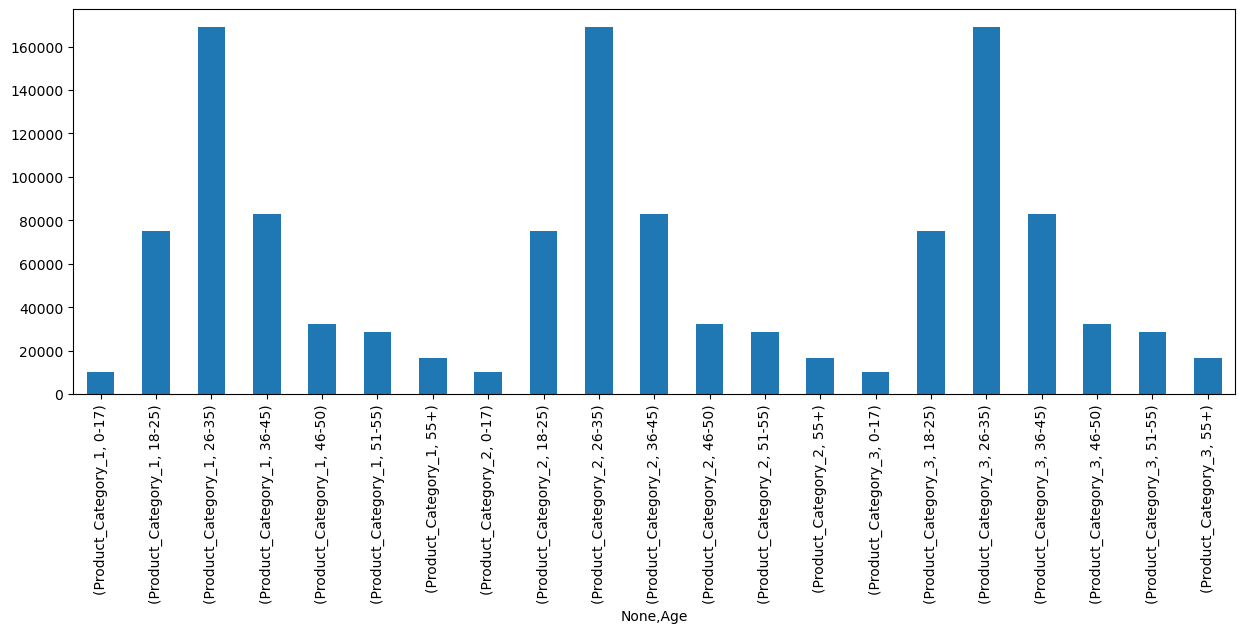

In [26]:
product_cat.plot(kind='bar', figsize=(15,5))

Men from 26-35 buy the most goods of all three categories. Other age groups also buy all 3 categories of goods in the same volume

Next, we will display the purchase amount. You may have already guessed which age group spent the most money

In [27]:
data_purchase = data_m.groupby('Age', as_index = False). \
agg({'Purchase':'sum'}). \
sort_values('Age', ascending = True)

data_purchase

,Age,Purchase
0,0-17,92527205
1,18-25,708372833
2,26-35,1588794345
3,36-45,783130921
4,46-50,304136539
5,51-55,277633647
6,55+,154984610


<Axes: xlabel='Age'>

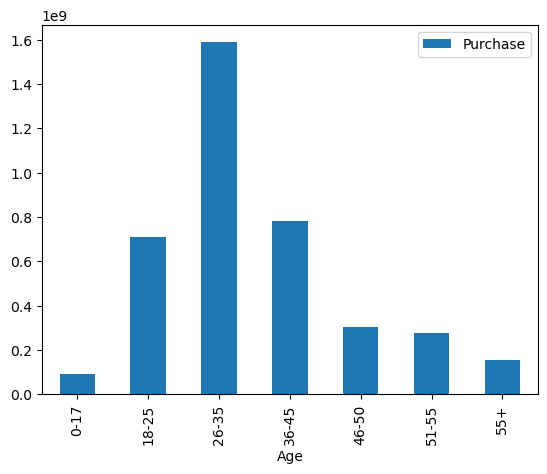

In [28]:
data_purchase.plot(x = 'Age', y = 'Purchase', kind = 'bar')

Now let 's sort the data by age category 26-35 and see who makes purchases more often married men or bachelors ?

In [30]:
data_marital_status1 = data[(data['Marital_Status'] == 1) & (data['Age']=='26-35')]

data_marital_status1.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
9,1000005,P00274942,M,26-35,20,A,1,1,8,9.842329,9.842329,7871
10,1000005,P00251242,M,26-35,20,A,1,1,5,11.000000,9.842329,5254
11,1000005,P00014542,M,26-35,20,A,1,1,8,9.842329,9.842329,3957
12,1000005,P00031342,M,26-35,20,A,1,1,8,9.842329,9.842329,6073
13,1000005,P00145042,M,26-35,20,A,1,1,1,2.000000,5.000000,15665
19,1000008,P00249542,M,26-35,12,C,4+,1,1,5.000000,15.000000,19614
20,1000008,P00220442,M,26-35,12,C,4+,1,5,14.000000,9.842329,8584
21,1000008,P00156442,M,26-35,12,C,4+,1,8,9.842329,9.842329,9872
22,1000008,P00213742,M,26-35,12,C,4+,1,8,9.842329,9.842329,9743
23,1000008,P00214442,M,26-35,12,C,4+,1,8,9.842329,9.842329,5982


In [31]:
data_purchase_marital_status1 = data_marital_status1.groupby('Age')['Purchase'].sum()
data_purchase_marital_status1

Age
26-35    798440476
Name: Purchase, dtype: int64

Now we can safely say that the ABC Private Limited store on Black Friday can make money on single men, aged 26-35 from city B.